In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
from sklearn.model_selection import train_test_split
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
x,y =mnist["data"], mnist["target"]
x.shape

(70000, 784)

In [3]:
y.shape

(70000,)

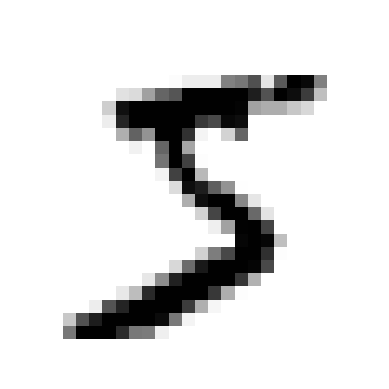

In [4]:
import matplotlib.pyplot as plt
some_digit=x[0]
some_digit_image=some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap="binary")
plt.axis("off")
plt.show()

In [5]:
y[0]

'5'

In [6]:
y=y.astype(np.uint8)

In [7]:
x_train,x_test,y_train,y_test=x[:60000],x[60000:],y[:60000],y[60000:]

In [8]:
y_train_5=(y_train==5)
y_test_5=(y_test==5)

In [9]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(x_train,y_train_5)

SGDClassifier(random_state=42)

In [10]:
sgd_clf.predict([some_digit])

array([ True])

In [11]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,x_train,y_train_5,cv=3,scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [12]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self,x,y=None):
        return self
    def predict(self,x):
        return np.zeros((len(x),1), dtype=bool)

In [13]:
never_5_clf=Never5Classifier()
cross_val_score(never_5_clf,x_train,y_train_5,cv=3,scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [14]:
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(sgd_clf,x_train,y_train_5,cv=3)

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [16]:
y_train_perfect=y_train_5
confusion_matrix(y_train_5,y_train_perfect)

array([[54579,     0],
       [    0,  5421]])

In [17]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5,y_train_pred)

0.8370879772350012

In [18]:
recall_score(y_train_5,y_train_pred)

0.6511713705958311

In [19]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.7325171197343847

In [20]:
y_score=sgd_clf.decision_function([some_digit])
y_score

array([2164.22030239])

In [21]:
threshold=0
y_some_digit_pred=(y_score>threshold)
y_some_digit_pred

array([ True])

In [22]:
threshold=8000
y_some_digit_pred=(y_score>threshold)
y_some_digit_pred

array([False])

In [23]:
y_score=cross_val_predict(sgd_clf,x_train,y_train_5,cv=3,method="decision_function")

In [24]:
from sklearn.metrics import precision_recall_curve
precisions, recalls,thresholds=precision_recall_curve(y_train_5,y_score)

In [25]:
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds, precisions[:-1],"b--", label="Precision")
    plt.plot(thresholds,recalls[:-1],"g-", label="Recall")
    plt.grid()
    plt.legend()

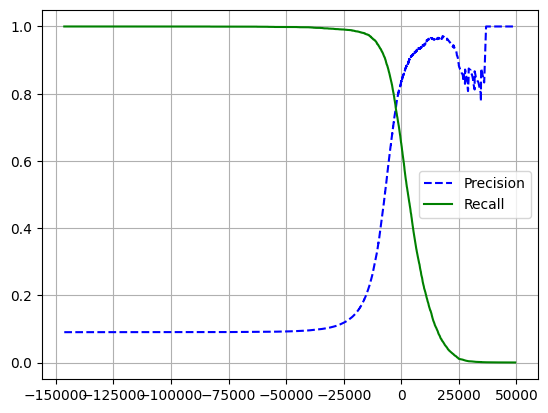

In [26]:
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

In [27]:
threshold_90_pre=thresholds[np.argmax(precisions>=0.90)]

In [28]:
y_train_pred_90=(y_score>=threshold_90_pre)

In [29]:
precision_score(y_train_5,y_train_pred_90)

0.9000345901072293

In [30]:
recall_score(y_train_5,y_train_pred_90)

0.4799852425751706

In [31]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_train_5,y_score)

In [32]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.grid()

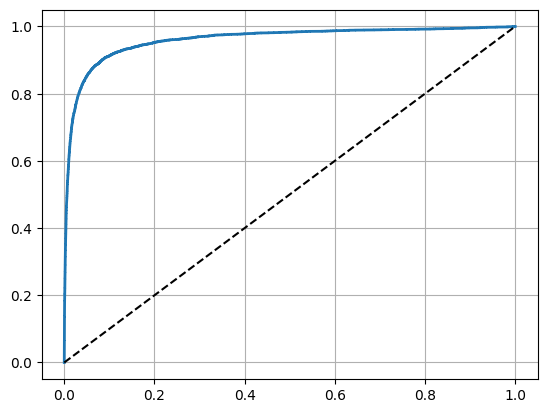

In [33]:
plot_roc_curve(fpr,tpr)
plt.show()

In [34]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_score)

np.float64(0.9604938554008616)

In [35]:
from sklearn.ensemble import RandomForestClassifier
forest_clf=RandomForestClassifier(random_state=42)
y_probas_forest=cross_val_predict(forest_clf,x_train,y_train_5,cv=3,method="predict_proba")

In [36]:
y_score_forest=y_probas_forest[:,1]
fpr_forest,tpr_forest,thresholds_forest=roc_curve(y_train_5,y_score_forest)

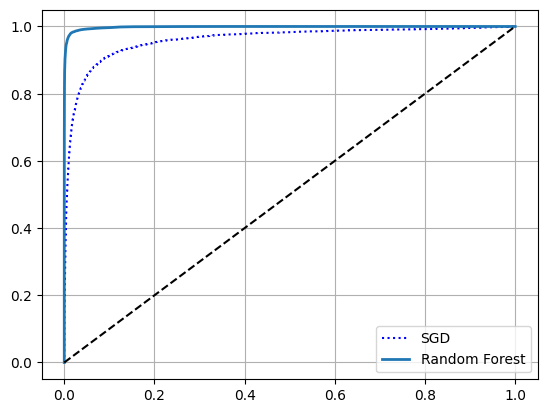

In [37]:
plt.plot(fpr,tpr,"b:", label="SGD")
plot_roc_curve(fpr_forest,tpr_forest,"Random Forest")
plt.legend(loc="lower right")
plt.show()

In [38]:
roc_auc_score(y_train_5,y_score_forest)

np.float64(0.9983436731328145)

In [40]:
from sklearn.svm import SVC
svm_clf=SVC()
svm_clf.fit(x_train,y_train)
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [42]:
some_digit_scores=svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [43]:
np.argmax(some_digit_scores)

np.int64(5)

In [44]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [45]:
svm_clf.classes_[5]

np.uint8(5)

In [46]:
from sklearn.multiclass import OneVsOneClassifier
ovr_clf=OneVsOneClassifier(SVC())
ovr_clf.fit(x_train,y_train)
ovr_clf.predict([some_digit])

array([5], dtype=uint8)

In [47]:
len(ovr_clf.estimators_)

45

In [48]:
sgd_clf.fit(x_train,y_train)
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [49]:
sgd_clf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [50]:
cross_val_score(sgd_clf,x_train,y_train,cv=3,scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [52]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train.astype(np.float64))
cross_val_score(sgd_clf,x_train_scaled,y_train,cv=3,scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

In [53]:
y_train_pred=cross_val_predict(sgd_clf,x_train_scaled,y_train,cv=3)
conf_mx=confusion_matrix(y_train,y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

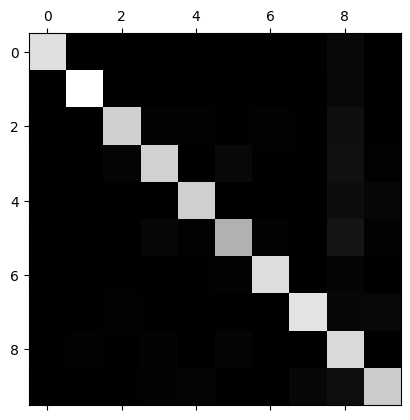

In [54]:
plt.matshow(conf_mx,cmap=plt.cm.gray)
plt.show()

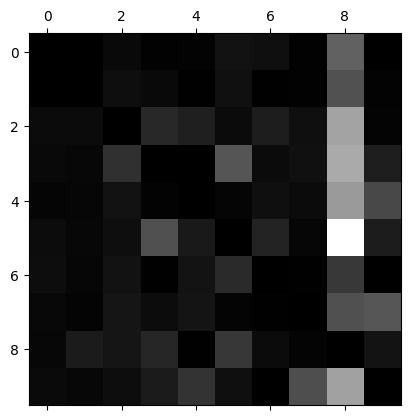

In [55]:
row_sums=conf_mx.sum(axis=1,keepdims=True)
norm_conf_mx=conf_mx/row_sums
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx,cmap=plt.cm.gray)

In [63]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large=(y_train>=7)
y_train_odd=(y_train%2==1)
y_multilabel=np.c_[y_train_large,y_train_odd]
knn_clf=KNeighborsClassifier()
knn_clf.fit(x_train,y_multilabel)

KNeighborsClassifier()

In [64]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [65]:
y_train_knn_pred=cross_val_predict(knn_clf,x_train,y_multilabel,cv=3)
f1_score(y_multilabel,y_train_knn_pred,average="macro")

0.9764102655606048

In [80]:
noise=np.random.randint(0,100,(len(x_train),784))
x_train_mod=x_train+noise
noise=np.random.randint(0,100,(len(x_test),784))
x_test_mod=x_test+noise
y_train_mod=x_train
y_test_mod=x_test

In [81]:
def plot_digit(digit_pixels):
    plt.imshow(digit_pixels.reshape(28, 28), cmap='binary')  # Reshape for MNIST (28x28)
    plt.axis('off')
    plt.show()

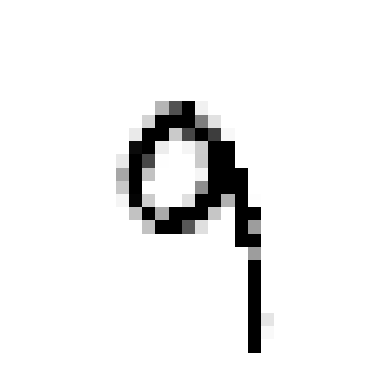

In [82]:
knn_clf.fit(x_train_mod,y_train_mod)
some_index=7
clean_digit=knn_clf.predict([x_test_mod[some_index]])
plot_digit(clean_digit)